## importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('zoo.csv')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
x= df.iloc[:, 1:17]
x.shape

(101, 16)

In [4]:
y=df.iloc[:,17]
y.shape

(101,)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8,test_size=.2)

In [6]:
from sklearn import tree
DTmodel=tree.DecisionTreeClassifier(criterion="entropy")
clf=DTmodel.fit(x_train,y_train)

In [7]:
pred=clf.predict(x_test)
accuracy=clf.score(x_test,y_test)
print('Accuracy',accuracy)

Accuracy 0.9523809523809523


In [8]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,pred))

[[11  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  1]
 [ 0  0  0  0  0  0]]


In [9]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      0.67      0.80         3
           7       0.00      0.00      0.00         0

    accuracy                           0.95        21
   macro avg       0.83      0.78      0.80        21
weighted avg       1.00      0.95      0.97        21



/home/root1/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


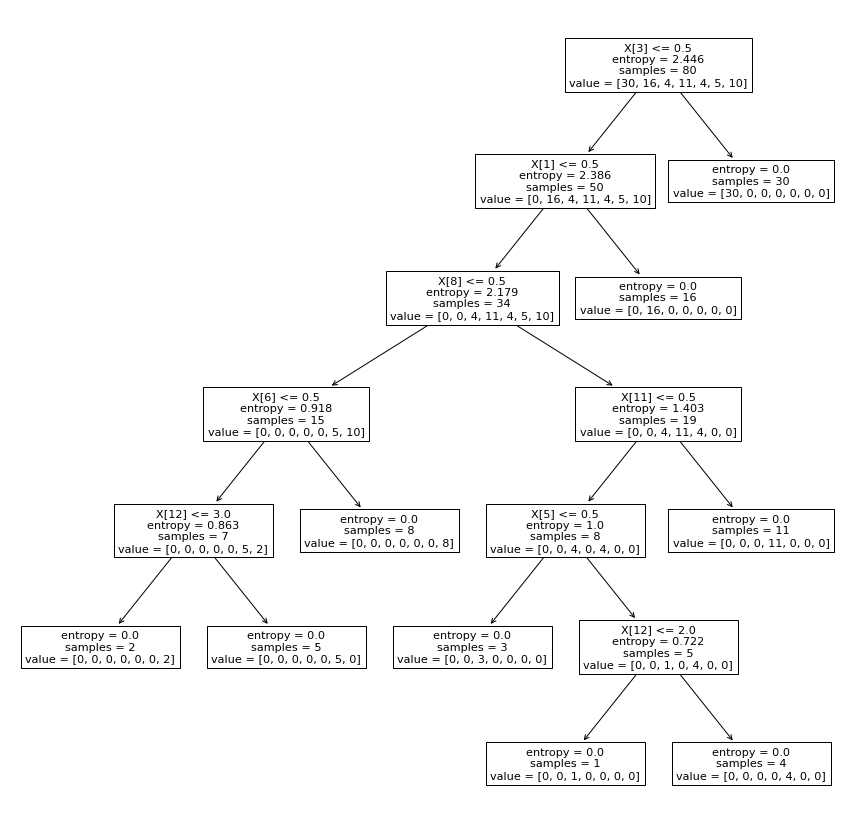

In [10]:
plt.figure(figsize=(15,15))
tree.plot_tree(DTmodel)
plt.show()